In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 10 13:17:46 2022

@author: BetzLab-Admin
"""

import sys
sys.path.append('../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr, fit_gaussian, find_ideal_R,most_common_value
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
#from pipython.datarectools import getservotime
import cv2
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [2]:
def select_file(khz_value, data_path):
    files = os.listdir(data_path)
    for file in files:
        if f"{khz_value}_khz" in file and ".avi" in file:
            return os.path.join(data_path, file)
    return None

data_path = r'\\134.76.13.158\betzlab\Julian\Hydrogel\measurement_2'

In [3]:
khz_list = [1, 5, 10, 25, 50]
picture_pair_list = []
movie_list = []
for khz in khz_list:
    file_path  = select_file(khz,data_path)
    numpy_movie = movie_to_array(file_path, max_frames=100)
    numpy_movie = clean_problem_pixels(numpy_movie)
    numpy_movie = numpy_movie - most_common_value(numpy_movie)
    movie_list.append(numpy_movie)

    picture_pair_list.append(numpy_movie[:3])

Processing video: 100%|██████████| 100/100 [00:00<00:00, 2113.11frame/s]


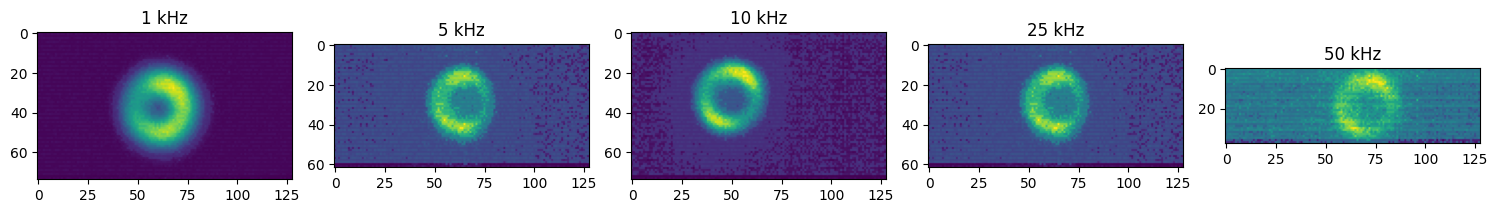

In [4]:

# Initialize a new figure
fig, axes = plt.subplots(1, len(picture_pair_list), figsize=(15, 5))
# Loop through each movie and display its first frame
for ax, movie, khz in zip(axes, picture_pair_list, khz_list):
    ax.imshow(movie[0])
    #ax.axis('off')  # Hides the axis numbers and ticks
    ax.set_title(f"{khz} kHz")
    


plt.tight_layout()
plt.show()


In [5]:
from fast_detection_methods import fit_gaussian

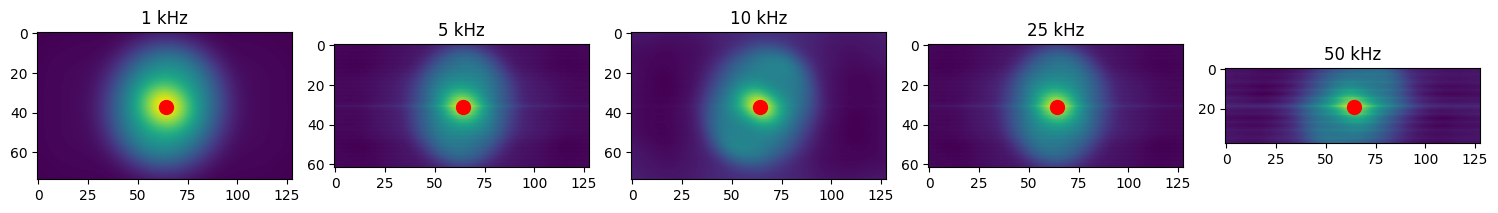

In [6]:
concolce_list = []
peak_list = []
filtered_conv_list = []
R = 10
for picture_pair in picture_pair_list:
    conv_picture = fftconvolve(picture_pair[0], np.flip(picture_pair[1]), mode='same')
    concolce_list.append(conv_picture)
    hight = conv_picture.shape[0]
    peak, uncertainty = fit_gaussian(conv_picture, R)
    peak_list.append(peak)

# Initialize a new figure
fig, axes = plt.subplots(1, len(picture_pair_list), figsize=(15, 5))

# Loop through each movie and display its first frame
for ax, conv, khz, peak in zip(axes, concolce_list, khz_list, peak_list):
    ax.imshow(conv)
    #ax.axis('off')  # Hides the axis numbers and ticks
    ax.set_title(f"{khz} kHz")
    ax.scatter(peak[0], peak[1], color='red', s=100)

plt.tight_layout()
plt.show()

In [10]:
tra_corr_list = []
for movie in movie_list:
    tra_corr_list.append(trajectory_corr(movie))

Processing frames: 100%|██████████| 99/99 [00:00<00:00, 291.62frame/s]


Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


Processing frames: 100%|██████████| 99/99 [00:00<00:00, 241.64frame/s]


Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


Processing frames: 100%|██████████| 99/99 [00:00<00:00, 306.01frame/s]


Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


Processing frames: 100%|██████████| 99/99 [00:00<00:00, 251.60frame/s]


Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.
Error during fitting: Optimal paramet

Processing frames: 100%|██████████| 99/99 [00:00<00:00, 269.82frame/s]


: 

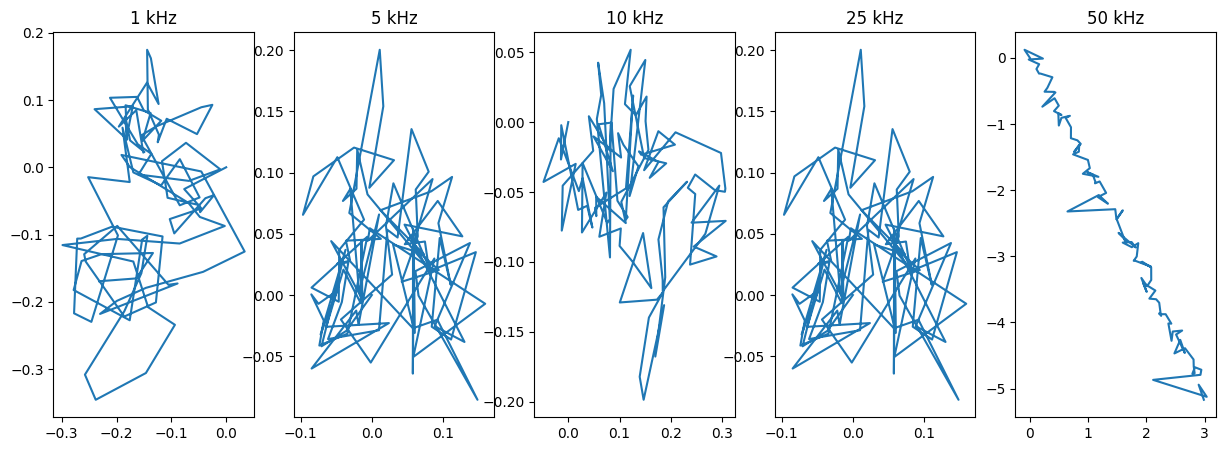

In [8]:
fig, axes = plt.subplots(1, len(movie_list), figsize=(15, 5))

# Loop through each movie and display the calculated trajectory
for ax, tra_corr, khz in zip(axes, tra_corr_list, khz_list):
    ax.plot(tra_corr[:,0], tra_corr[:,1])
    ax.set_title(f"{khz} kHz")

In [12]:
movie_list[-1].shape

(100, 38, 128)

In [60]:
tra_corr=trajectory_corr(numpy_movie)

Processing frames: 100%|██████████| 99/99 [00:00<00:00, 268.48frame/s]


In [61]:
from fast_detection_methods import find_shift_corr, fit_gaussian

In [62]:
find_shift_corr(numpy_movie[0],numpy_movie[0],4)

C:\Users\jschulz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(18.65356605801277, 29.823887831052552, inf, inf)

In [63]:
test_movie = np.array([numpy_movie[0] for i in range(100)])
testtra_corr=trajectory_corr(test_movie)

Processing frames: 100%|██████████| 99/99 [00:01<00:00, 53.90frame/s]


In [66]:
image_1 = numpy_movie[0]
image_2 = numpy_movie[1]
R =5
fft_convolved_image = fftconvolve(image_1, np.flip(image_2), mode='same')
peak, uncertainty = fit_gaussian(fft_convolved_image, R)

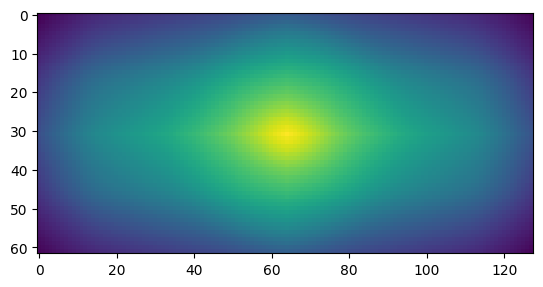

In [67]:
plt.imshow(fft_convolved_image)

In [68]:
peak

(-43093.482593758396, -3986.791690499448)

In [54]:
uncertainty

array([0.02441634, 0.02441634])

In [55]:
test_movie[1]=test_movie[0]

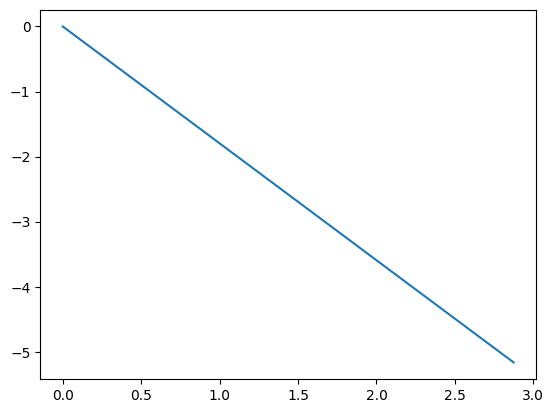

In [11]:
plt.plot(testtra_corr[:,0],testtra_corr[:,1])   

In [20]:
tra_mean = trajectory_mean(numpy_movie)
tra_corr=trajectory_corr(numpy_movie)
gauss_degrees = range(2)
tra_gauss_list = []
for degree in gauss_degrees:
    tra_gauss_list.append(trajectory_gauss(numpy_movie, degree=degree))

Processing frames: 100%|██████████| 100/100 [00:00<?, ?frame/s]

KeyboardInterrupt: 

In [8]:
trajectory_list = [tra_mean, tra_corr] + tra_gauss_list
name_list = ['mean', 'corr'] + ['gauss_' + str(degree) for degree in gauss_degrees]

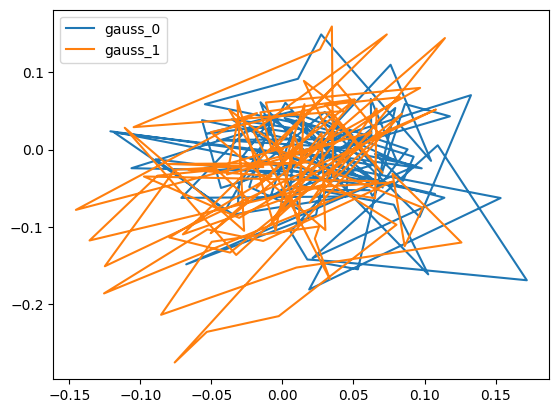

In [11]:
#plot all trajectories

for i, trajectory in enumerate(trajectory_list):
    name = name_list[i]
    if name!= 'mean' and name != 'corr' : # Use != instead of 'is not'
        plt.plot(trajectory[:, 0], trajectory[:, 1], label=name)
plt.legend()
plt.show()


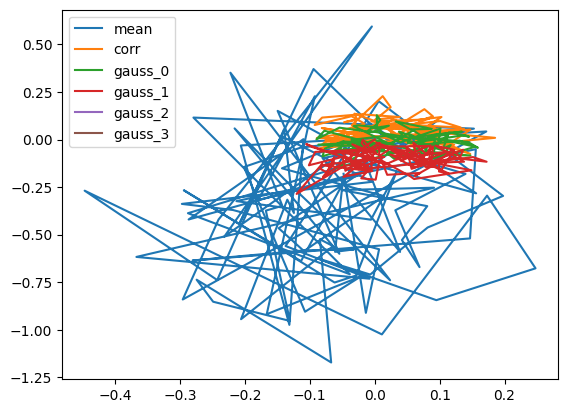

In [67]:

for i, trajectory in enumerate(trajectory_list):
    name = name_list[i]
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=name)
plt.legend()
plt.show()